<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula18b_adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]
crgb = LinearSegmentedColormap.from_list('custom_cmap', colors)

In [152]:
import matplotlib.pyplot as plt

def plot_dataset(X, y, xlim=(-0.15, 1.15), ylim=(-0.15, 1.15)):
  plt.figure(figsize=(6,6))
  plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, cmap=crgb)
  plt.xlim(*xlim)
  plt.ylim(*ylim)

[-1 -1 -1 -1  1  1  1  1 -1  1 -1  1  1 -1  1  1 -1  1  1  1]


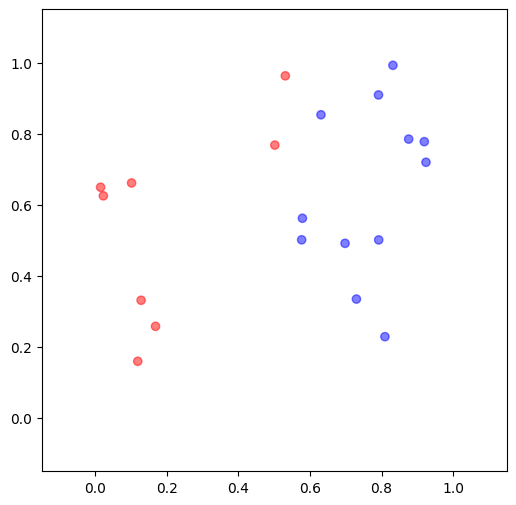

In [153]:
import numpy as np

def create_dataset(n=20, tilt=[2,1], intercept=0):
  X = np.random.uniform(size=(n,2))
  AUX = X * np.array(tilt) - [0, intercept]
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

X, y = create_dataset(intercept=-0.4)
print(y)
plot_dataset(X, y)
plt.show()

In [154]:
def plot_hyperplan(vector, intercept, xs=[0,1]):
  xs = np.array(xs)
  ys = -(vector[0]*xs+intercept)/vector[1]
  plt.plot(xs, ys, 'k--')

In [165]:
tilt = np.random.uniform(size=(2,), low=-1, high=1)
intercept = np.random.uniform(size=(1,1), low=-0.1, high=0.1)[0,0]
print(tilt, intercept)


[-0.64062867 -0.5776223 ] -0.019834474789612713


[0.67400818 0.42648653]
[[-2.58783081]
 [ 2.19901253]] [0.01916414]
1.0


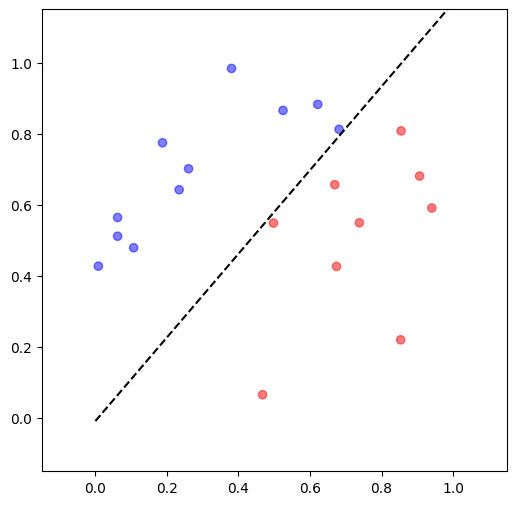

0.981


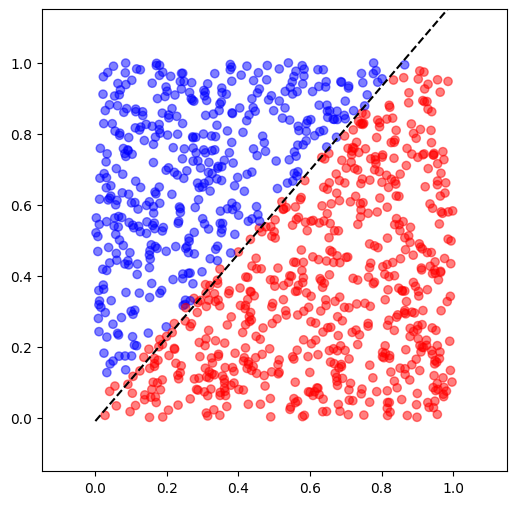

In [181]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class Adaline(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=1000, learning_rate=0.01):
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def fit(self, X, y):
    self.w_ = np.zeros(shape=(X.shape[1],1))
    self.bias_ = np.zeros(shape=(1,))
    y = y.reshape(-1, 1)
    # Widrow-Hoff
    for _ in range(self.max_iter):
      ypred = (X @ self.w_ + self.bias_)
      error = (y - ypred).reshape(-1,1)
      self.w_ += X.T @ error * self.learning_rate
      self.bias_ += np.sum(error) * self.learning_rate
      cost = np.sum(error**2)
      if cost == 0:
        break

  def predict(self, X):
    ypred = np.sign(X @ self.w_ + self.bias_)
    return np.array(ypred, dtype=int)

  def score(self, X, y):
    ypred = self.predict(X)
    return accuracy_score(y, ypred)

X, y = create_dataset(20, tilt=tilt, intercept=intercept)
print(X[0])
model = Adaline()
model.fit(X, y)
print(model.w_, model.bias_)
ypred = model.predict(X)
print(model.score(X, y))
plot_dataset(X, y)
plot_hyperplan(model.w_, model.bias_)
plt.show()

X_test, y_test = create_dataset(1000, tilt=tilt, intercept=intercept)
print(model.score(X_test, y_test))
plot_dataset(X_test, y_test)
plot_hyperplan(model.w_, model.bias_)
plt.show()